In [1]:
from GG_mthesis import *
%matplotlib inline

In [2]:
df = pd.read_csv('data/03_processed/SOCAT/06AQ20160220_north.csv')

In [3]:
distance = gsw.distance(df['lon'], df['lat'])
distance_cum = np.insert(np.cumsum(distance), 0, 0)
df['distance_cum'] = distance_cum

df['distance_aux'] = np.insert(distance, 0, -999)
df = df.where(df['distance_aux'] > 120)
#df = df.drop('distance_aux', axis=1)

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]


In [4]:
df['time'] = pd.to_datetime(df['datetime'])
df = df.drop(0, axis=0)

In [5]:
from GG_mthesis.SOCAT_processing import SOCAT
df = SOCAT.sort_transect(df)
df = df.reset_index()

In [8]:
df

,index,datetime,Expocode,QC_Flag,lon,lat,sample_depth [m],sal,T,Tequ [deg.C],WOA_SSS,ETOPO2_depth [m],dist_to_land [km],SA,CT,rho,bearing,distance_cum,distance_aux,time
0,2662,2016-03-19 21:56:38,06AQ20160220,D,-66.9975,-57.9240,NaN,33.879,4.950,5.94,34.006,3137.0,235.0,34.039272,4.956649,1026.793332,18.655568,2.174283e+06,58642.400061,2016-03-19 21:56:38
1,2661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,5,2016-03-02 08:52:42,06AQ20160220,D,-66.3603,-60.4126,NaN,33.636,1.730,3.01,33.846,2863.0,397.0,33.796091,1.736968,1026.901115,0.000000,9.555990e+04,63809.754457,2016-03-02 08:52:42
2658,4,2016-03-01 22:46:20,06AQ20160220,D,-66.0955,-59.8541,NaN,33.637,1.808,2.76,33.911,4095.0,430.0,33.796908,1.815017,1026.896029,6.310983,3.175014e+04,10714.443706,2016-03-01 22:46:20
2659,3,2016-03-01 20:57:50,06AQ20160220,D,-65.9045,-59.8634,NaN,33.640,1.690,2.84,33.906,2670.0,421.0,33.799945,1.696916,1026.907101,323.944871,2.103570e+04,20500.592522,2016-03-01 20:57:50
2660,2,2016-03-01 19:08:45,06AQ20160220,D,-65.6962,-60.0154,NaN,33.618,1.506,2.67,33.835,3203.0,400.0,33.777924,1.512929,1026.902651,325.532317,5.351047e+02,334.324502,2016-03-01 19:08:45


In [9]:
df['distance_aux'].mean()

3826.7189991990654

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15000/2343847637.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels(

[Text(1.4568e+18, 0, '02:40:00 AM 01 Mar'),
 Text(1.457e+18, 0, '10:13:20 AM 03 Mar'),
 Text(1.4572e+18, 0, '05:46:40 PM 05 Mar'),
 Text(1.4574e+18, 0, '01:20:00 AM 08 Mar'),
 Text(1.4576e+18, 0, '08:53:20 AM 10 Mar'),
 Text(1.4578e+18, 0, '04:26:40 PM 12 Mar'),
 Text(1.458e+18, 0, '12:00:00 AM 15 Mar'),
 Text(1.4582e+18, 0, '07:33:20 AM 17 Mar'),
 Text(1.4584e+18, 0, '03:06:40 PM 19 Mar'),
 Text(1.4586e+18, 0, '10:40:00 PM 21 Mar')]

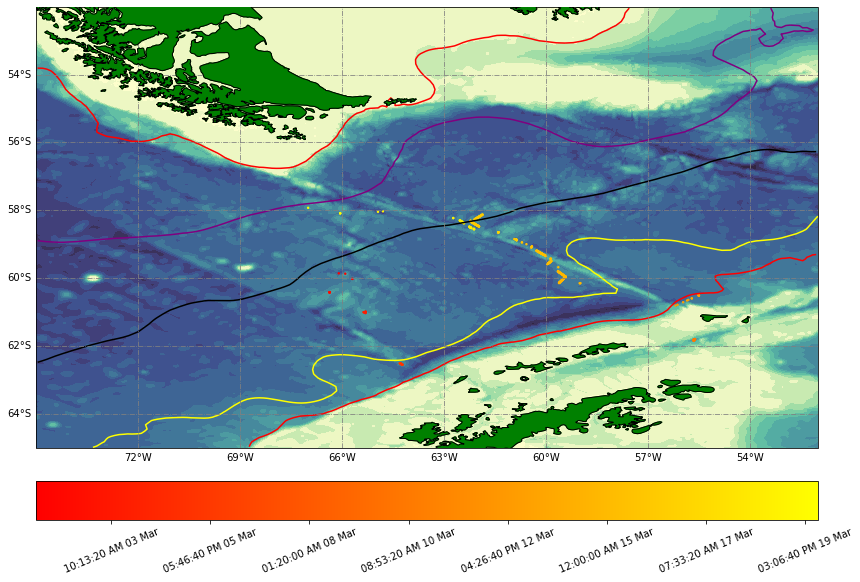

In [28]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
scat = ax.scatter(df['lon'], df['lat'], c=df['time'], cmap='autumn', s=2)
cbar = plt.colorbar(scat, location='bottom', pad=0.05, ax=ax)
cbar.ax.set_xticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%r %d %b'), rotation=22.5)

In [10]:
SOCAT.downsample(df, 500).dropna()

,rho,lon,lat
500.0,1026.760056,-62.397273,-55.062995
1000.0,1026.756753,-62.401606,-55.066746
1500.0,1026.756045,-62.405936,-55.070497
2000.0,1026.754917,-62.410136,-55.074296
2500.0,1026.754532,-62.414245,-55.078128
...,...,...,...
3034000.0,1026.729559,-66.694800,-56.997151
3034500.0,1026.729066,-66.691518,-57.001277
3035000.0,1026.733283,-66.688252,-57.005406
3035500.0,1026.730222,-66.685007,-57.009541
